In [1]:
# Imports Dependencies
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy

In [36]:
# Obtains Image Contour Lines
def obtainImageContourLines(imageToContour):
    
    # Loads in the original image
    originalImage = cv2.imread(imageToContour)
    
    # Grayscales the image
    grayscaledImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

    # Applies Gaussian Blur to the image
    kernelSize = 5
    grayscaledBlurredImage = cv2.GaussianBlur(grayscaledImage, (kernelSize, kernelSize), 0)

    # Processes Edge Detection via Canny
    lowThreshold = 25 # Low threshold value of intensity gradient
    highThreshold = 50 # High threshold value of intensity gradient
    imageEdges = cv2.Canny(grayscaledBlurredImage, lowThreshold, highThreshold)

    # Utilizes HoughLinesP to obtain contour lines
    rho = 1 # Distance resolution in pixels of the Hough grid
    theta = numpy.pi / 180 # Angular resolution in radians of the Hough grid
    threshold = 15 # Minimum number of votes (Intersections in Hough grid cell)
    minimumLineLength = 100 # Minimum number of pixels making up a line
    maximumLineGap = 20 # Maximum gap in pixels between connectable line segments
    lineImage = numpy.copy(originalImage) * 0 # Creating a blank to draw lines on
                             
    # Runs Hough on the edge detected image
    # Output lines is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(imageEdges, rho, theta, threshold, numpy.array([]), minimumLineLength, maximumLineGap)
                             
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lineImage, (x1, y1), (x2, y2), (255, 0, 0), 5)
                             
    # Draws the lines on the original source image
    lineEdges = cv2.addWeighted(originalImage, 0.8, lineImage, 1, 0)
    
    pyplot.imshow(lineEdges)

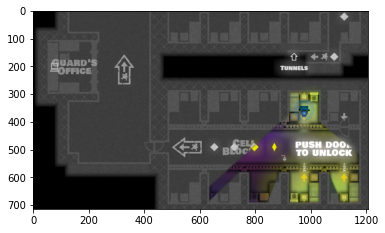

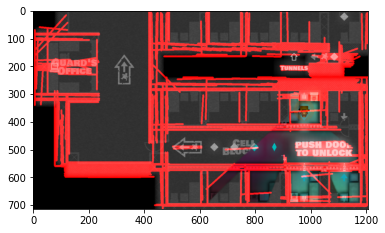

In [37]:
# Displays Original Image
originalTestImage = image.imread('monacoL1M1TestImage.png')
plottedTestImage = pyplot.imshow(originalTestImage)
pyplot.show(plottedTestImage)

# Displays Contour Overlayed Image
obtainImageContourLines('monacoL1M1TestImage.png')